In [1]:
import requests

# 从 token.txt 文件中读取 token
with open('../token.txt', 'r') as file:
    token = file.read().strip()

# 设置请求头中的 Authorization 标头
headers = {
    'Authorization': f'Bearer {token}'
}

url = 'http://localhost:1234/marketindex/momentum'

In [2]:
my_data = []

response = requests.get(url, headers=headers)

if response.status_code == 200:
    my_data = response.json()
    print('Response data:', my_data)  # 输出响应数据
else:
    print('Request failed with status code:', response.status_code)

Response data: [1.3, 1.36, 1.32, 1.15, 1.13, 1.23, 1.06, 0.98, 1.01, 1.13, 1.27, 1.34, 1.39, 1.38, 1.4, 1.35, 1.31, 1.35, 1.35, 1.17, 1.23, 1.14, 1.23, 1.45, 1.46, 1.4, 1.36, 1.12, 1.13, 1.14, 1.09, 1.08, 1.11, 0.4, 0.36, 0.3, 0.42, 0.43, 0.32, 0.23, 0.21, 0.21, 0.21, 0.15, 0.23, 0.27, 0.2, 0.27, 0.26, 1.03, 1.02, 1.05, 1.16, 1.15, 1.23, 1.52, 1.77, 1.78, 1.59, 1.61, 1.63, 1.52, 1.53, 1.5, 1.38, 1.23, 1.41, 1.36, 0.96, 0.92, 0.98, 1.02, 1.06, 1.07, 0.99, 0.99, 0.87, 1.43, 1.44, 1.49, 1.37, 1.42, 1.4, 1.54, 1.46, 1.45, 1.42, 1.4, 1.42, 1.46, 1.47, 1.47, 1.44, 1.44, 1.41, 1.42, -0.02, -0.04, -0.03, -0.13, 0.01, 0.01, 0.31, 0.23, 0.39, 0.29, -0.62, -0.63, -0.56, -0.77, -0.69, -0.65, -0.54, -0.59, -0.56, -0.74, -0.31, -0.42, -0.39, -0.46, -0.4, -0.42, -0.51, -0.53, -0.51, -0.7, -1.03, -1.06, -0.93, -0.95, -1.18, -1.16, -1.12, -1.18, -1.07, -1.03, -1.24, -1.44, -0.97, -0.85, -0.95, -0.95, -0.22, -0.17, -0.19, -0.17, -0.23, -0.2, -0.11, 0.09, 0.2, 0.23, 0.17, 0.19, 0.15, 0.17, 0.18, 0.18, 0.

In [3]:
import pandas as pd

df = pd.DataFrame(my_data)
df.to_excel('momentum_data.xlsx', index=False)

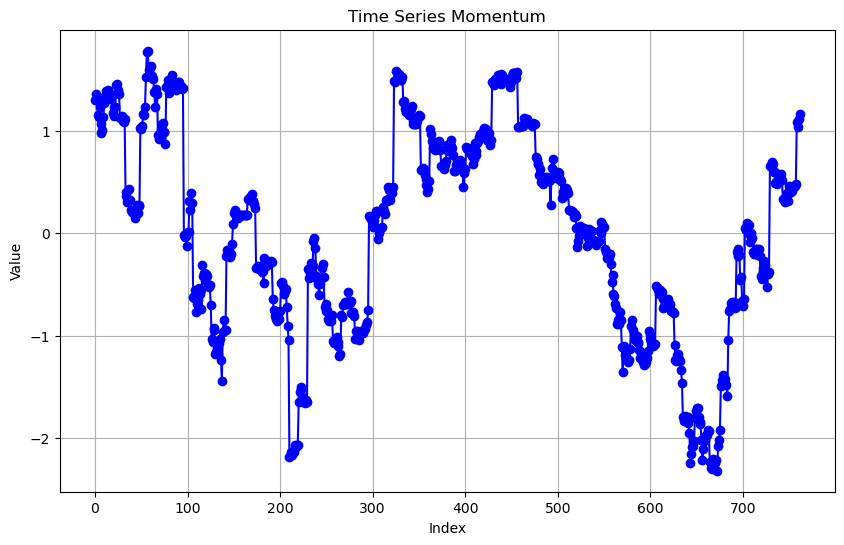

In [3]:

import matplotlib.pyplot as plt
# 绘制时间序列数据
plt.figure(figsize=(10, 6))
plt.plot(my_data, marker='o', linestyle='-', color='b')
plt.title('Time Series Momentum')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()